## 1 . First we need to read and explore the datasets: 
   ### 1.1 PEA07 - PEA25-Estimated_Pupulation-1996-2017.csv

In [1]:

import pandas as pd
import numpy as np

#Datasets:
pea07 ="./Dataset/PEA07-Estimated_Pupulation-1996-2017.csv"
pea04 ="./Dataset/PEA04-Estimated_Pupulation-2011-2023.csv" 


df1 = pd.read_csv(pea07)
print(df1.head(2))

print(F"Columns Names:\n",df1.columns)


                           Statistic Label Age Group         Sex  \
0  Estimated Population (Persons in April)  All ages  Both sexes   
1  Estimated Population (Persons in April)  All ages  Both sexes   

  Regional Authority Area  Year      UNIT   VALUE  
0                   State  1996  Thousand  3626.1  
1                   State  1997  Thousand  3664.3  
Columns Names:
 Index(['Statistic Label', 'Age Group', 'Sex', 'Regional Authority Area',
       'Year', 'UNIT', 'VALUE'],
      dtype='object')


In [2]:
## Now we need to drop unicessary columns, and rename the other ones.

df1 = df1.rename(columns={'VALUE': 'Population'})
df1 = df1.loc[:,['Regional Authority Area','Year',"Population"]]

# Rechecking the data
df1 = df1.sort_values(by='Year', ascending=True)

print(df1.head(20))

print(f"\n check if there are null data")
print(df1.isnull().sum())

print(f"\n Shape:",df1.shape)

    Regional Authority Area  Year  Population
0                     State  1996      3626.1
176              South-West  1996       546.6
154              South-East  1996       391.5
44                  Midland  1996       205.5
22                   Border  1996       407.3
66                     West  1996       352.4
132                Mid-West  1996       317.1
110                Mid-East  1996       347.4
88                   Dublin  1996      1058.3
89                   Dublin  1997      1072.2
1                     State  1997      3664.3
177              South-West  1997       549.1
155              South-East  1997       393.3
111                Mid-East  1997       361.2
23                   Border  1997       408.2
133                Mid-West  1997       317.8
67                     West  1997       354.0
45                  Midland  1997       208.5
134                Mid-West  1998       322.0
90                   Dublin  1998      1081.4

 check if there are null data
Reg

### As we can see, the data is splited by "Regional Authority Area", and considering that State means the sum of all "Regional Authority Areas", we need to filter the data by State.


In [3]:
# Filter the DataFrame to only include rows with Regional Authority Area = state
df1 = df1[df1['Regional Authority Area'] == 'State']
# Print the DataFrame
print(df1)
print(f"\n check if there are null data")
print(df1.isnull().sum())

print(f"\n Shape:",df1.shape)


   Regional Authority Area  Year  Population
0                    State  1996      3626.1
1                    State  1997      3664.3
2                    State  1998      3703.1
3                    State  1999      3741.6
4                    State  2000      3789.5
5                    State  2001      3847.2
6                    State  2002      3917.2
7                    State  2003      3979.9
8                    State  2004      4045.2
9                    State  2005      4133.8
10                   State  2006      4232.9
11                   State  2007      4375.8
12                   State  2008      4485.1
13                   State  2009      4533.4
14                   State  2010      4554.8
15                   State  2011      4574.9
16                   State  2012      4585.4
17                   State  2013      4614.7
18                   State  2014      4645.4
19                   State  2015      4687.8
20                   State  2016      4739.6
21        

In [4]:
# Remove the column "Regional Authority Area"
#Create a function, to prevent error on re-execution

def drop_column(df, column):
  try:
    df.drop(column, axis=1, inplace=True)
  except KeyError:
    print(f"Column {column} does not exist or has already been dropped.")
    pass

drop_column(df1,'Regional Authority Area')
    

print(df1)

    Year  Population
0   1996      3626.1
1   1997      3664.3
2   1998      3703.1
3   1999      3741.6
4   2000      3789.5
5   2001      3847.2
6   2002      3917.2
7   2003      3979.9
8   2004      4045.2
9   2005      4133.8
10  2006      4232.9
11  2007      4375.8
12  2008      4485.1
13  2009      4533.4
14  2010      4554.8
15  2011      4574.9
16  2012      4585.4
17  2013      4614.7
18  2014      4645.4
19  2015      4687.8
20  2016      4739.6
21  2017      4792.5


###  PEA04-Estimated_Pupulation-2011-2023.csv

In [5]:

import pandas as pd
import numpy as np

df2 = pd.read_csv(pea04)
print(df2.head(2))

print(F"Columns Names:\n",df2.columns)

                           STATISTIC Label  Year Age Group         Sex  \
0  Estimated Population (Persons in April)  2011  All ages  Both sexes   
1  Estimated Population (Persons in April)  2011  All ages  Both sexes   

   Region      UNIT   VALUE  
0   State  Thousand  4574.9  
1  Border  Thousand   391.9  
Columns Names:
 Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Region', 'UNIT',
       'VALUE'],
      dtype='object')


In [6]:
## Now we need to drop unicessary columns, and rename the other ones.

df2 = df2.rename(columns={'VALUE': 'Population'})
df2 = df2.loc[:,['Region','Year',"Population"]]

# Rechecking the data
df2 = df2.sort_values(by='Year', ascending=True)

print(df2.head(20))

print(f"\n check if there are null data")
print(df2.isnull().sum())

print(f"\n Shape:",df2.shape)

        Region  Year  Population
0        State  2011      4574.9
1       Border  2011       391.9
2         West  2011       440.8
3     Mid-West  2011       466.8
4   South-East  2011       410.3
5   South-West  2011       662.3
6       Dublin  2011      1261.5
7     Mid-East  2011       657.4
8      Midland  2011       283.8
17     Midland  2012       287.2
16    Mid-East  2012       664.7
14  South-West  2012       667.4
13  South-East  2012       411.6
15      Dublin  2012      1260.6
11        West  2012       439.4
10      Border  2012       392.1
9        State  2012      4593.7
12    Mid-West  2012       470.6
26     Midland  2013       289.3
25    Mid-East  2013       666.4

 check if there are null data
Region        0
Year          0
Population    0
dtype: int64

 Shape: (117, 3)


### As we can see, the data is splited by "Region", and considering that State means the sum of all "Regions", we need to filter the data by State.



In [7]:
# Filter the DataFrame to only include rows with Regional Authority Area = state
df2 = df2[df2['Region'] == 'State']
# Print the DataFrame
print(df2)
print(f"\n check if there are null data")
print(df2.isnull().sum())

print(f"\n Shape:",df2.shape)


    Region  Year  Population
0    State  2011      4574.9
9    State  2012      4593.7
18   State  2013      4614.7
27   State  2014      4645.4
36   State  2015      4687.8
45   State  2016      4739.6
54   State  2017      4810.9
63   State  2018      4884.9
72   State  2019      4958.5
81   State  2020      5029.9
90   State  2021      5074.7
99   State  2022      5184.0
108  State  2023      5281.6

 check if there are null data
Region        0
Year          0
Population    0
dtype: int64

 Shape: (13, 3)


## Now lets remove the column 'Regional Authority Area' and Merge both dataset.

In [8]:
# Remove the column "Regional Authority Area"
#Create a function, to prevent error on re-execution

def drop_column(df, column):
  try:
    df.drop(column, axis=1, inplace=True)
  except KeyError:
    print(f"Column {column} does not exist or has already been dropped.")
    pass

drop_column(df2,'Region')



# filter second dataset, to get values from 2018 to 2023
df2 = df2[(df2['Year'] >= 2018) & (df2['Year'] <= 2023)]
print(df2)





     Year  Population
63   2018      4884.9
72   2019      4958.5
81   2020      5029.9
90   2021      5074.7
99   2022      5184.0
108  2023      5281.6


In [19]:


# Merge the two DataFrames on the 'Year' column
merged_df = df1.merge(df2, on='Year', how='outer')

merged_df['Population_x'].fillna(merged_df['Population_y'], inplace=True)



# Print the merged DataFrame
print(merged_df)




    Year  Population_x  Population_y
0   1996        3626.1           NaN
1   1997        3664.3           NaN
2   1998        3703.1           NaN
3   1999        3741.6           NaN
4   2000        3789.5           NaN
5   2001        3847.2           NaN
6   2002        3917.2           NaN
7   2003        3979.9           NaN
8   2004        4045.2           NaN
9   2005        4133.8           NaN
10  2006        4232.9           NaN
11  2007        4375.8           NaN
12  2008        4485.1           NaN
13  2009        4533.4           NaN
14  2010        4554.8           NaN
15  2011        4574.9           NaN
16  2012        4585.4           NaN
17  2013        4614.7           NaN
18  2014        4645.4           NaN
19  2015        4687.8           NaN
20  2016        4739.6           NaN
21  2017        4792.5           NaN
22  2018        4884.9        4884.9
23  2019        4958.5        4958.5
24  2020        5029.9        5029.9
25  2021        5074.7        5074.7
2

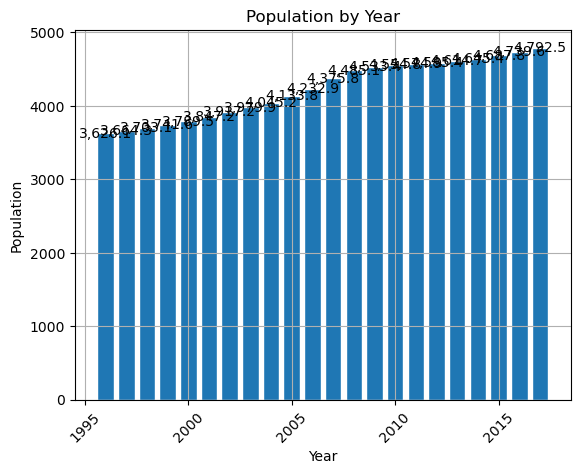

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by year
df1 = df1.sort_values(by=['Year'], ascending=True)

year = df1['Year'].to_numpy()
population = df1['Population'].to_numpy()

# Create a bar chart of the population for each year
plt.bar(year, population, color='tab:blue', edgecolor='white')

# Add labels to the bars
for i in range(len(year)):
  plt.annotate(f'{population[i]:,}', (year[i], population[i]), ha='center', va='center')

# Set the title and labels of the plot
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')

# Add a grid to the plot
plt.grid(True)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()
